<a href="https://colab.research.google.com/github/AashiDutt/8051-Micro-Controller-Programming/blob/master/Chapter_2_California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

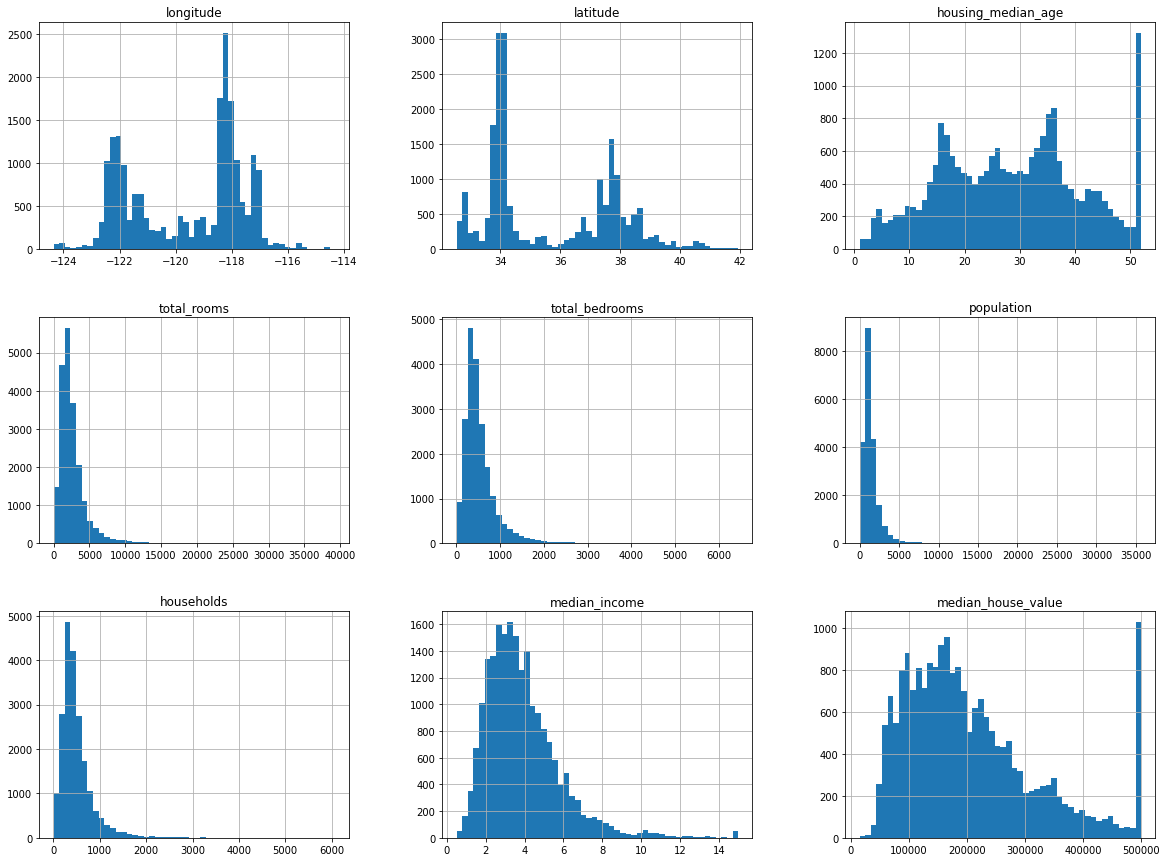

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [9]:
import numpy as np

# ------ Numpy implemented Train_test_split -------

In [21]:
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)* test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return (data.iloc[train_indices], data.iloc[test_indices])

In [22]:

train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))

16512


In [23]:
len(test_set)

4128

**Problem** - We do not want to see the test set before prediction but overtime the split_train_test program will explore us to test data as well (due to reshuffling).

A solution can be to use random seed i.e np.random.seed(42) that will generate same shuffled indices every time. or save the test set on first run and load it in the subsequent runs.

But both these solutions will break the next tim you fetch an updated data.

A common solution to use can be to use each instance's(datapoint) identifier to decide whether or not it should go in the test set.

In [24]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff <test_ratio *2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]



In [25]:
# Our data does not have an identifier column so, we'll just create one

housing_with_id = df.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# ---------Built In Train_test_split----------

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [11]:
# create a income category attribute - median income is a continuos numerical attribute

df['income_cat'] = pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

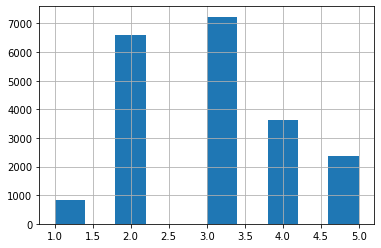

In [12]:
df['income_cat'].hist()

In [14]:
# Stratified Sampling - means sampling where data is collected such that the whole data is representative of whole population.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]



In [15]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis = 1, inplace = True)

In [18]:
# Visualization
#create a copy of training set to use for visualization - leave test_set alone

df = strat_train_set.copy()

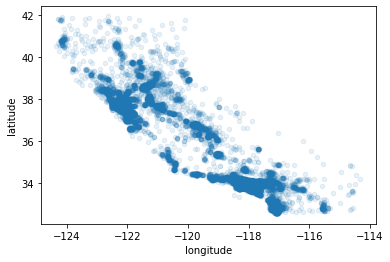

In [20]:
# Alpha makes it easier to pin out places with high density data points
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1) 

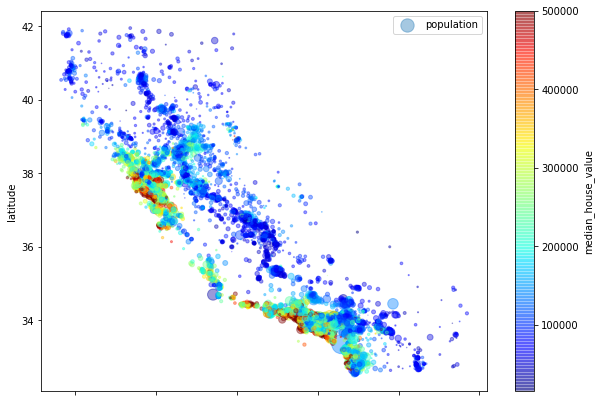

In [21]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s = df['population']/100, label = "population", figsize = (10,7), c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend() 

The radius of each circle represents the districts population and color represents price.

In [25]:
import seaborn as sns

In [27]:
corr_matrix = df.corr()

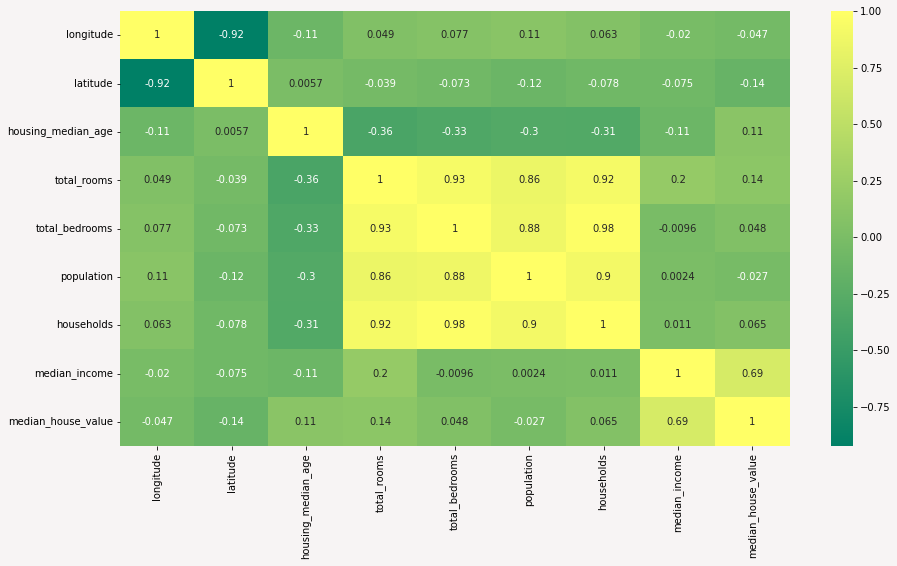

In [26]:
plt.figure(figsize = (15, 8), facecolor = "#F7F4F4")
sns.heatmap(df.corr(), annot = True, cmap = "summer");

In [28]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cef433250>,
      dtype=object)

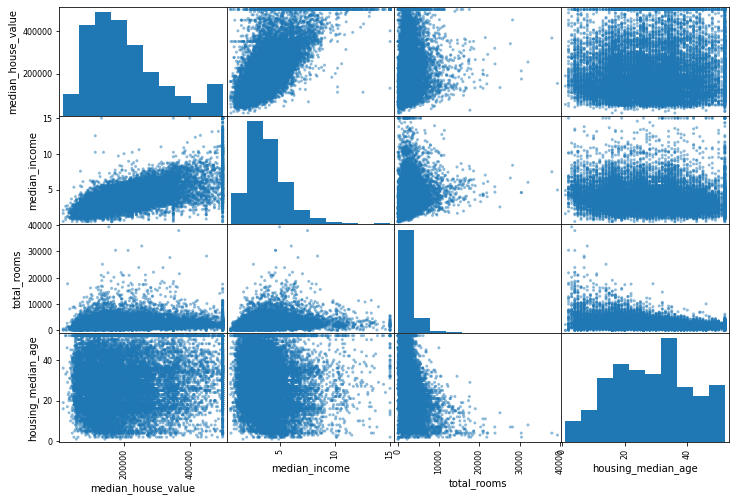

In [29]:
# Works only for numerical values

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize= (12,8))

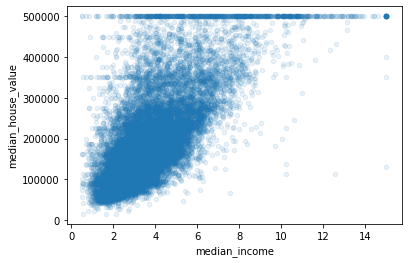

In [30]:
df.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

An upward trend is good but we want to remove the horizontal lines occuring at 45,0000, 35,0000, 25,0000 and so on because we do not want our model to learn this trend.

In [35]:
# Lets create new attributes combining the existing ones

df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [36]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [37]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

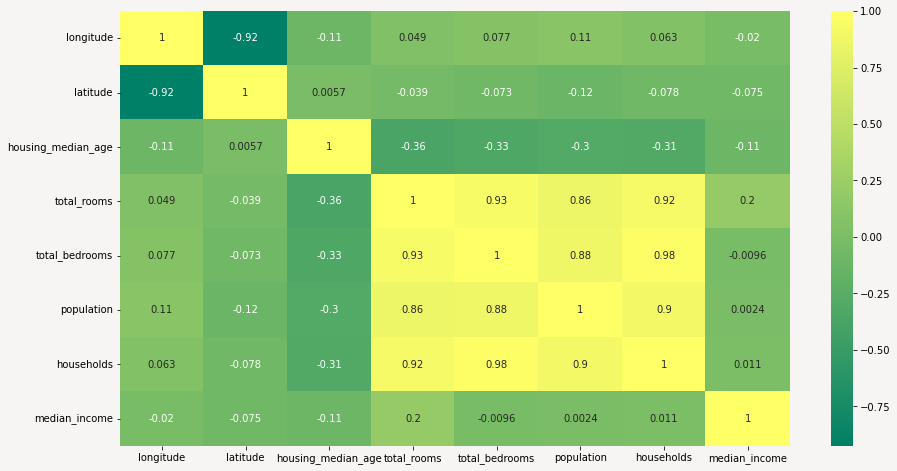

In [55]:
plt.figure(figsize = (15, 8), facecolor = "#F7F4F4")
sns.heatmap(df.corr(), annot = True, cmap = "summer");

In [40]:
df = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [41]:
# Drop missing values/ get rid of attribute/ replave missing values with mean, median or zero

df.dropna(subset = ['total_bedrooms'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [42]:
# SKLearn in built class to take care of missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [43]:
# Since median can be calculated for numerical value attributes only, thus we need to create a copy of data by dropping text value attribute

housing_num = df.drop("ocean_proximity", axis = 1)

In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [45]:
#imputer stores result in statistics_instance varible

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [46]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [47]:
#Training_set 

X = imputer.transform(housing_num)

In [49]:
# Handling categorical or text data
housing_cat = df[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [50]:
#Use encoder to encode text into numerical values, you can also look for subsequent categories using categories_

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
# Now we have values ranging from 0 to 4. But this is not the case here - the house is either in close proximity of ocean or it isn't.
# Thus it is either 0 or 1. To convert values from 0to 4 to just 0 or 1, we can make use of One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [53]:
#Sparse matrix only stores the location of non-zero element instead of all zeros and just one 1 ([1., 0., 0., 0., 0., ....]) to save memory.

# To convert sparse matrix to numpy array use
# housing_cat_1hot.toarray()

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Creating Transformation pipeline via long method 

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
    population_per_household = X[:, population_ix]/X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_extra_attribs = attr_adder.transform(df.values)

In [57]:
# Pipelines to order specific transformation steps in series

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")), ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

### Instead of writing the above code and transforming numeric and text values separately , we can use ColumnTransformer that does all work at same time - Transfomrmation Pipeline

In [59]:
from sklearn.compose import ColumnTransformer

# housing_num = df.drop("ocean_proximity", axis = 1) for reference purpose only

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(df)

In [60]:
# Select and Train Model

# housing_labels = strat_train_set['median_house_value'].copy() just for reference

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [61]:
some_data = df.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [62]:
print("Labels: ", list(some_labels))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


It works !! though predictions are not quite accurate. Lets find error


In [63]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

Clearly, the predicted housing prices are off by $68627

In [64]:
# Lets try Deccision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [65]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Model is likely to overfit the data

In [66]:
# Lets try better evaluation using Cross_Validation
# The trick is to divide the training and validation set into smaller parts and train the model on each part.
# or better use K fold cross validation - randomly splits training_set into 10 subsets called folds, then trains it and evaluates the decision tree 10 times.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [67]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("standard deviation: ", scores.std() )

In [68]:
display_scores(tree_rmse_scores)

Scores:  [73185.11183367 68897.09724477 68849.67071649 73045.19356958
 69702.03169875 78132.02952134 68112.422039   73403.38096305
 69967.76091064 71331.62552585]
Mean:  71462.63240231498
standard deviation:  2893.160304186667


In [69]:
# Lets check same scores for linear regression model to help compare

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
standard deviation:  2880.3282098180634


Standard deviation for decision tree model is more than that for linear regression model. Hence, Decision tree model can be said as to Overfit the data.

In [70]:
# Try Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [71]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18782.367242968667

In [73]:

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [51495.19225443 48768.7251069  46776.42200446 52073.32079734
 47552.13545696 51754.48679115 52387.51218608 49701.02472433
 48616.57421914 53659.52135742]
Mean:  50278.49148982073
standard deviation:  2187.0529416350696


Random Forest Rewgressor worked much better

In [74]:
#Fine Tune the Model - instead of finding best combination of hyperparameters ourself, just use Gridsearchcv

from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_estimators': [3,10,30], "max_features": [2,4,6,8]
},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

In [75]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

best hyper paramters would be to set max_features = 6 and n_estimators = 30

In [78]:
cvres = grid_search.cv_results_

In [79]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63962.63599550649 {'max_features': 2, 'n_estimators': 3}
55156.852731573774 {'max_features': 2, 'n_estimators': 10}
52876.23260376077 {'max_features': 2, 'n_estimators': 30}
60107.27802590543 {'max_features': 4, 'n_estimators': 3}
52966.28808681287 {'max_features': 4, 'n_estimators': 10}
50133.48959125422 {'max_features': 4, 'n_estimators': 30}
58546.89403745284 {'max_features': 6, 'n_estimators': 3}
52235.905770379526 {'max_features': 6, 'n_estimators': 10}
49978.574170860324 {'max_features': 6, 'n_estimators': 30}
59147.969487381684 {'max_features': 8, 'n_estimators': 3}
52267.09569201497 {'max_features': 8, 'n_estimators': 10}
50143.68885277722 {'max_features': 8, 'n_estimators': 30}
61017.853400285276 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54497.428464433615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60075.59057354531 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52860.866727748326 {'bootstrap': False, 'max_features': 3, 'n_estimato

When search space is large, instead of using GridSearchCV- use RandomizedSearchCV.

In [81]:
# Method to fine tune model is using Ensemble methods i.e group the models that performed the best alone.

# Analyse best models and their errors

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.48405218e-02, 6.86861359e-02, 4.41373877e-02, 1.76091714e-02,
       1.62193964e-02, 1.74817855e-02, 1.73192324e-02, 3.67683797e-01,
       7.07598201e-02, 1.04006811e-01, 4.95130406e-02, 1.33555346e-02,
       1.28041802e-01, 3.84513936e-05, 3.49659996e-03, 6.81051244e-03])

In [82]:
extra_attribs = ['rooms_per_hhold', "pop_per_hhold", "bedrooms_per_room"]

In [86]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3676837974350723, 'median_income'),
 (0.12804180195990397, 'INLAND'),
 (0.10400681056002964, 'pop_per_hhold'),
 (0.07484052179703253, 'longitude'),
 (0.07075982009385597, 'rooms_per_hhold'),
 (0.06868613585421059, 'latitude'),
 (0.04951304060350142, 'bedrooms_per_room'),
 (0.04413738765415524, 'housing_median_age'),
 (0.017609171407491245, 'total_rooms'),
 (0.017481785483639004, 'population'),
 (0.0173192323594616, 'households'),
 (0.016219396409097763, 'total_bedrooms'),
 (0.0133555345903242, '<1H OCEAN'),
 (0.006810512435016868, 'NEAR OCEAN'),
 (0.0034965999635776465, 'NEAR BAY'),
 (3.845139363008341e-05, 'ISLAND')]

We can drop some attributes with low value

In [87]:
# Final model

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)


In [88]:
final_rmse

47753.37291981585

In [90]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([45758.67349764, 49668.02845065])